In [1]:
from pathlib import Path
import os
import sys
sys.path.append(os.path.abspath(''))

import pandas as pd 
import numpy as np

from tqdm.notebook import tqdm

import config.config as cfg 

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

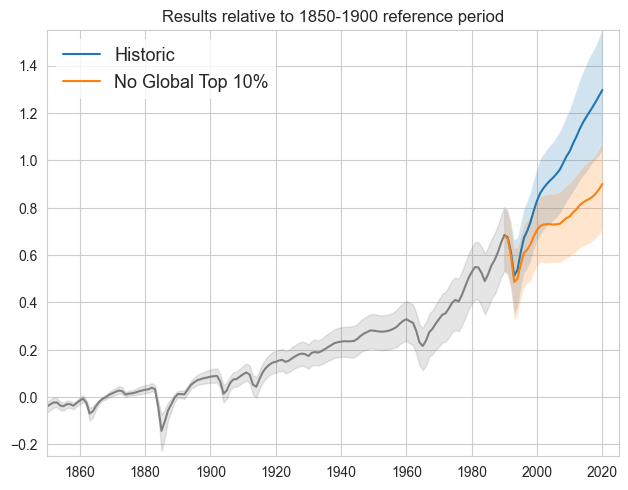

In [2]:
magicc_df = pd.read_csv(cfg.PROCESSED_GMT_DIR / 'MAGICC-GMT_processed.csv')

color_map = dict(zip(['ssp245', 'World_p90p100_equal-scaling', 'World_p99p100_equal-scaling', 'World_p999p100_equal-scaling'], ['C0', 'C1', 'C2', 'C3']))
label_map = dict(zip(['ssp245', 'World_p90p100_equal-scaling', 'World_p99p100_equal-scaling', 'World_p999p100_equal-scaling'], ['Historic', 'No Global Top 10%', 'No Top 1%', 'No Top 0.1%']))


with sns.axes_style('whitegrid'):
    plt.figure()
    for scenario in list(color_map.keys())[:2]:
        sub_df = magicc_df[magicc_df.scenario == scenario]
        plt.fill_between(np.arange(1990,2021,1), np.quantile(sub_df.iloc[:, 7:].values.T[190:,:], q = 0.05, axis = 1), np.quantile(sub_df.iloc[:, 7:].values.T[190:,:], q = 0.95, axis = 1), alpha = .2)
        plt.plot(np.arange(1990,2021,1), np.mean(sub_df.iloc[:, 7:].values.T[190:,:], axis = 1), color = color_map[scenario], label = label_map[scenario])
    plt.fill_between(np.arange(1800,1991,1), np.quantile(sub_df.iloc[:, 7:].values.T[:191,:], q = 0.05, axis = 1), np.quantile(sub_df.iloc[:, 7:].values.T[:191,:], q = 0.95, axis = 1), alpha = .2, color = 'grey')
    plt.plot(np.arange(1800,1991,1), np.mean(sub_df.iloc[:, 7:].values.T[:191,:], axis = 1), color = 'grey')
    plt.xlim(1850, 2025)
    plt.ylim(-0.25,1.55)
    plt.legend(frameon = True, edgecolor = 'none', facecolor = (1,1,1,.7), loc = 'upper left', fontsize = 13)
    plt.tight_layout()
    plt.title('Results relative to 1850-1900 reference period')
    plt.show()